**Model Building-Machine Learning

Random Forest, Logistic Regression, XGBoost, LightGBM

In [1]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assume that you've already evaluated the models and stored their evaluation metrics
# model_results = {
#     'Random Forest': {'accuracy': rf_accuracy, 'f1_score': rf_classificationreport['macro avg']['f1-score']},
#     'Tuned Random Forest': {'accuracy': rftuned_accuracy, 'f1_score': rftuned_classificationreport['macro avg']['f1-score']},
#     'XGBoost': {'accuracy': xgb_accuracy, 'f1_score': xgb_classificationreport['macro avg']['f1-score']},
#     'Tuned XGBoost': {'accuracy': xgbtuned_accuracy, 'f1_score': xgbtuned_classificationreport['macro avg']['f1-score']},
#     'LightGBM': {'accuracy': lgb_accuracy, 'f1_score': lgb_classificationreport['macro avg']['f1-score']},
#     'Tuned LightGBM': {'accuracy': lgbtuned_accuracy, 'f1_score': lgbtuned_classificationreport['macro avg']['f1-score']}
# }

# # Convert the results into a DataFrame
# df_results = pd.DataFrame(model_results).T

# # Plotting the results for comparison
# fig, ax = plt.subplots(figsize=(12, 6))

# # Create a bar plot for both accuracy and F1-score
# df_results.plot(kind='bar', ax=ax)

# # Customize the plot
# ax.set_title('Model Comparison: Accuracy and F1-Score')
# ax.set_xlabel('Models')
# ax.set_ylabel('Score')
# ax.set_ylim(0, 1)  # Score range is from 0 to 1
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [2]:
#%pip install statsmodels pandas numpy matplotlib seaborn scikit-learn scipy xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,silhouette_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint
import pickle
from sklearn.decomposition import PCA

train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['Social_Anxiety_Category'])
y_train = train_data['Social_Anxiety_Category']

X_val = val_data.drop(columns=['Social_Anxiety_Category'])
y_val = val_data['Social_Anxiety_Category']

X_test = test_data.drop(columns=['Social_Anxiety_Category'])
y_test = test_data['Social_Anxiety_Category']

In [4]:
# ------------------ Model Performance Evaluation ------------------

def evaluate_model(model, model_name, X_train, y_train, X_val, y_val, cv=5):
    # Predictions
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Display model name and accuracy
    print(f"\n{'='*40}\n{' '*10}{model_name} Evaluation\n{'='*40}")
    print(f"\nAccuracy: {accuracy:.4f}\n")

    # ------------------- Classification Report -------------------
    classificationreport = classification_report(y_val, y_pred, output_dict=True)
    report_df = pd.DataFrame(classificationreport).transpose()

    print("\nClassification Report:")
    display(report_df.round(2))

    # ------------------- Confusion Matrix -------------------
    confusionmatrix = confusion_matrix(y_val, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusionmatrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.title(f'{model_name} - Confusion Matrix', fontsize=16, pad=20)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # ------------------- Learning Curve -------------------
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=cv,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Accuracy', color='blue', markersize=6, linewidth=2)
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Accuracy', color='orange', markersize=6, linewidth=2)

    # Fill between the learning curve
    plt.fill_between(train_sizes,
                     train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1),
                     alpha=0.1, color='blue')
    plt.fill_between(train_sizes,
                     val_scores.mean(axis=1) - val_scores.std(axis=1),
                     val_scores.mean(axis=1) + val_scores.std(axis=1),
                     alpha=0.1, color='orange')

    plt.title(f'Learning Curve - {model_name}', fontsize=16, pad=20)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return accuracy, classificationreport, confusionmatrix

Model 1 : RandomForest


          Random Forest Evaluation

Accuracy: 0.9480


Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20399.00
1,0.89,1.00,0.94,27324.00
2,1.00,0.83,0.91,20460.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.96,0.94,0.95,68183.00
weighted avg,0.95,0.95,0.95,68183.00


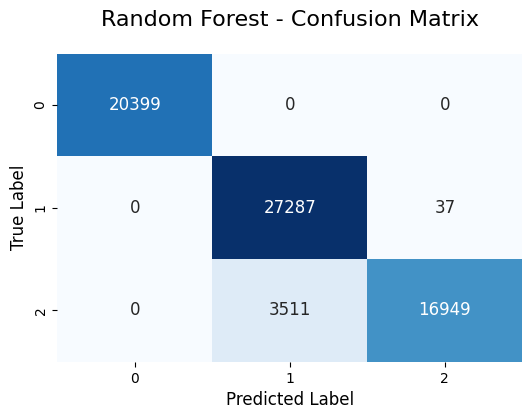

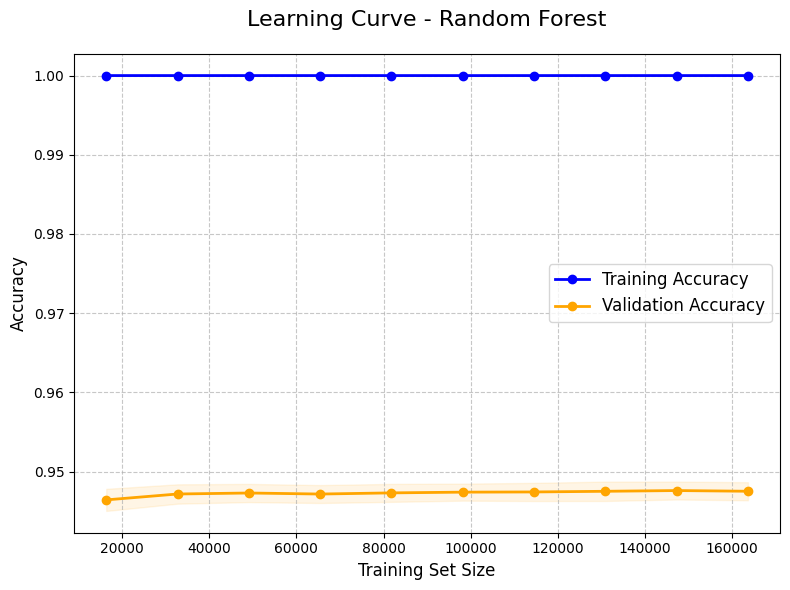

In [5]:
rf_model = RandomForestClassifier(n_estimators=80, random_state=42)
rf_model.fit(X_train, y_train)

rf_accuracy, rf_classificationreport, rf_confusionmatrix = evaluate_model(
    rf_model,
    "Random Forest",
    X_train, y_train,
    X_val, y_val
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Best Hyperparameter,Value
0,n_estimators,300
1,min_samples_split,5
2,min_samples_leaf,4
3,max_features,log2
4,max_depth,20
5,Best Cross-Validation Accuracy,0.947797


Best Hyperparameters and Cross-Validation Accuracy:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'Best Cross-Validation Accuracy': np.float64(0.9477973474450412)}

          Tuned Random Forest Evaluation

Accuracy: 0.9482


Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,20399.00
1,0.89,1.00,0.94,27324.00
2,1.00,0.83,0.91,20460.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.96,0.94,0.95,68183.00
weighted avg,0.95,0.95,0.95,68183.00


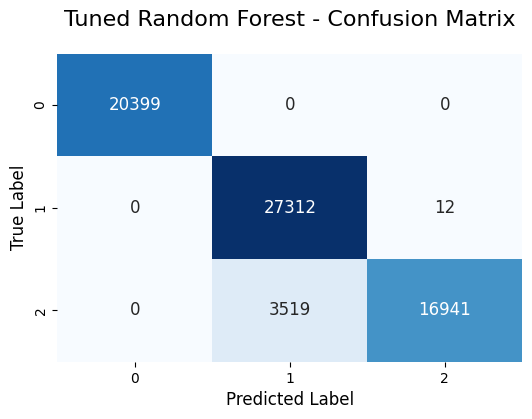

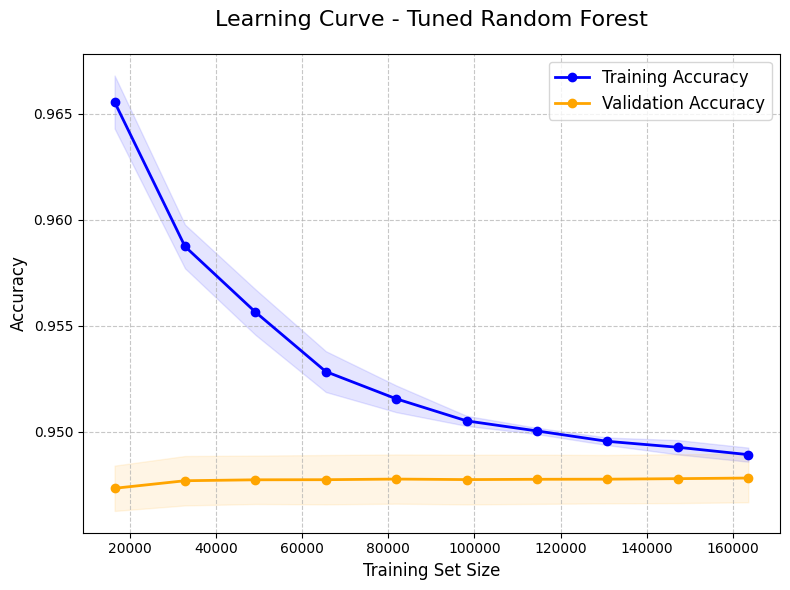

In [7]:
from IPython.display import display
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [10, 20, 30],        
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['sqrt', 'log2']  # Removed 'auto', kept valid options 'sqrt' and 'log2'
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=50, cv=cv_strategy, n_jobs=-1, random_state=42, 
                                   verbose=2, scoring='accuracy')

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params['Best Cross-Validation Accuracy'] = best_score

best_params_df = pd.DataFrame(list(best_params.items()), columns=['Best Hyperparameter', 'Value'])

display(best_params_df)

print("Best Hyperparameters and Cross-Validation Accuracy:")
print(best_params)

best_rf_model = random_search.best_estimator_

rftuned_accuracy, rftuned_classificationreport, rftuned_confusionmatrix = evaluate_model(
    best_rf_model,
    "Tuned Random Forest",
    X_train, y_train,
    X_val, y_val
)

Model 2:XGB


          XGBoost Evaluation

Accuracy: 0.9435


Classification Report:


,precision,recall,f1-score,support
0,0.99,1.00,1.00,20399.00
1,0.88,0.99,0.93,27324.00
2,0.99,0.83,0.90,20460.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.96,0.94,0.94,68183.00
weighted avg,0.95,0.94,0.94,68183.00


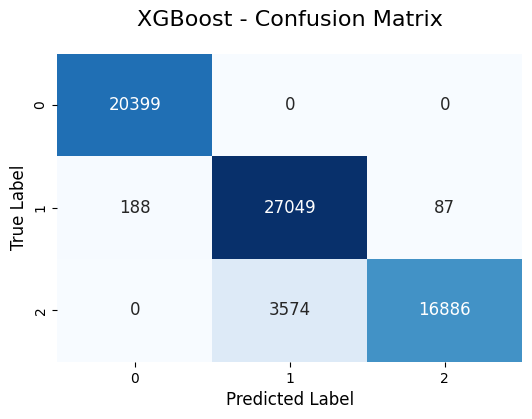

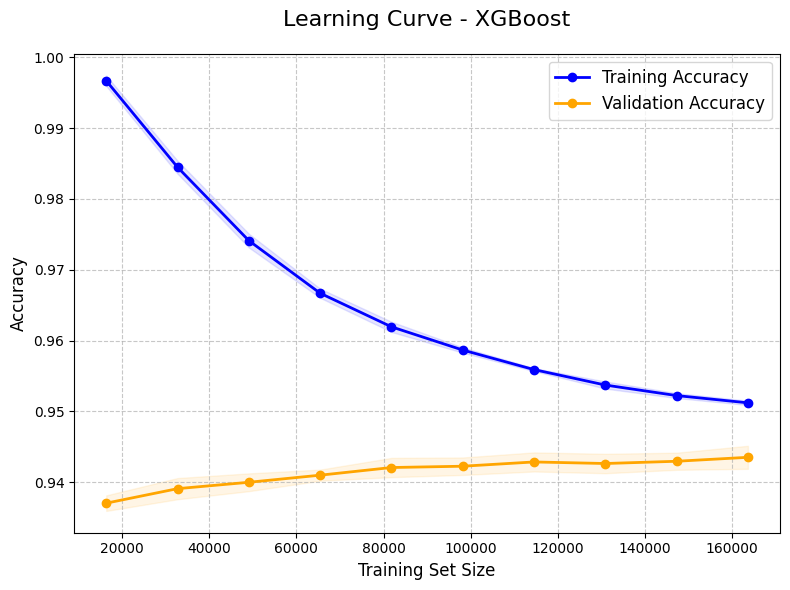

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost model without the deprecated 'use_label_encoder' argument
xgb_model = XGBClassifier(
    eval_metric='mlogloss',   # Sets the evaluation metric to logarithmic loss (for multi-class classification)
    random_state=42           # Ensure reproducibility
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Evaluate the model using the custom evaluate_model function
xgb_accuracy, xgb_classificationreport, xgb_confusionmatrix = evaluate_model(
    xgb_model,
    "XGBoost",
    X_train, y_train,
    X_val, y_val
)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


,Hyperparameter,Value
0,colsample_bytree,0.800000
1,gamma,0.000000
2,learning_rate,0.100000
3,max_depth,3.000000
4,n_estimators,100.000000
5,subsample,0.800000
6,Best Cross-Validation Accuracy,0.944502


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8, 'Best Cross-Validation Accuracy': np.float64(0.9445022952935483)}
Best Cross-Validation Accuracy: 0.9445022952935483

          Tuned XGBoost Evaluation

Accuracy: 0.9441


Classification Report:


,precision,recall,f1-score,support
0,0.99,1.00,1.00,20399.00
1,0.88,0.99,0.93,27324.00
2,1.00,0.82,0.90,20460.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.96,0.94,0.94,68183.00
weighted avg,0.95,0.94,0.94,68183.00


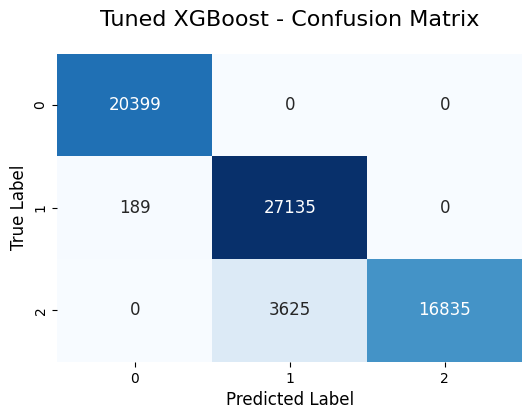

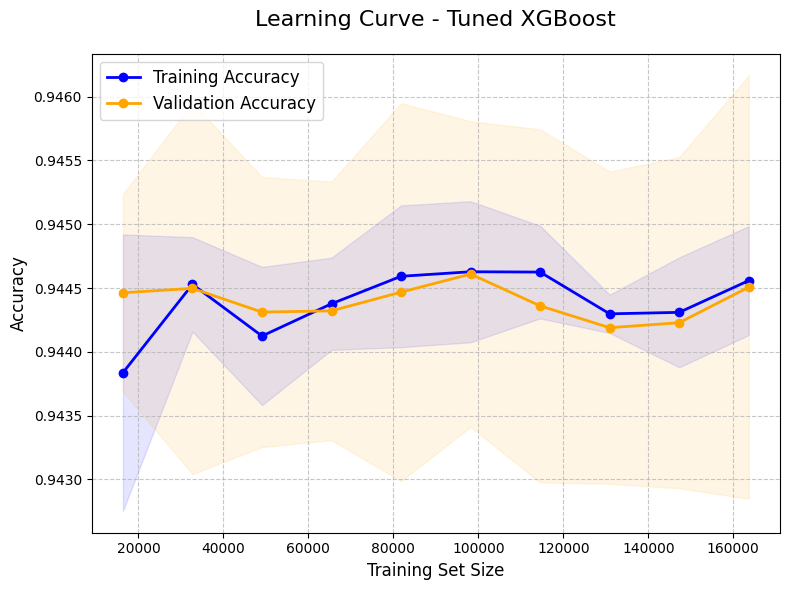

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from IPython.display import display
import pandas as pd

# Initialize the XGBClassifier
xgb_model = XGBClassifier(
    eval_metric='mlogloss',   
    random_state=42         
)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 6],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1]  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,  
    n_jobs=-1, 
    verbose=2  
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params['Best Cross-Validation Accuracy'] = best_score

# Display the best hyperparameters and score in a DataFrame
best_params_df = pd.DataFrame(list(best_params.items()), columns=['Hyperparameter', 'Value'])

display(best_params_df)

# Print the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Evaluate the tuned XGBoost model using the existing evaluate_model function
xgbtuned_accuracy, xgbtuned_classificationreport, xgbtuned_confusionmatrix = evaluate_model(
    best_xgb_model,
    "Tuned XGBoost",
    X_train, y_train,
    X_val, y_val
)

Model 3:CLustering

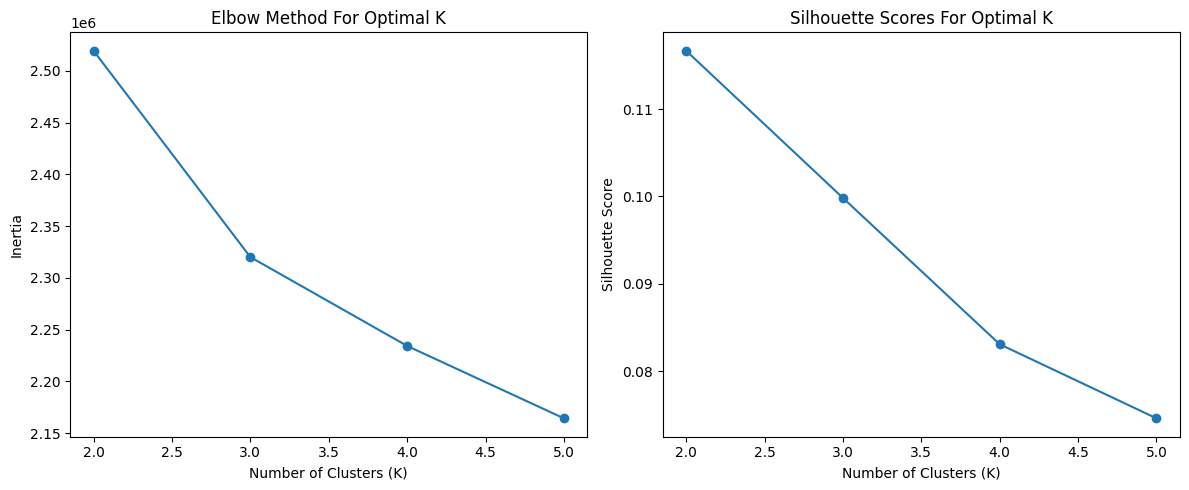

Optimal number of clusters (K): 2
Final Silhouette Score: 0.1167


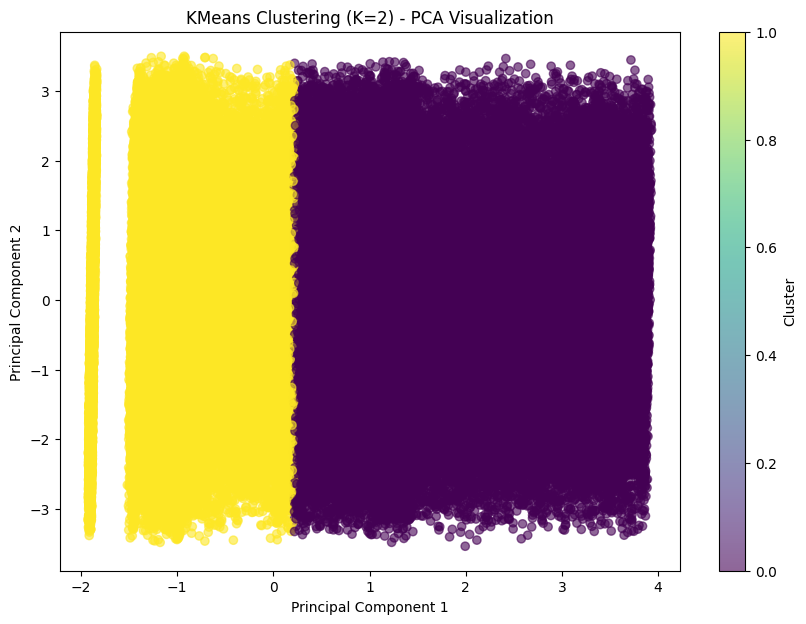


Cluster Characteristics:
         Likes Received (per post)  Comments Received (per post)  \
Cluster                                                            
0                       506.870477                    249.959477   
1                       502.347346                    249.425712   

         Socioeconomic Status  Education Level  Body Image Impact (1-10)  \
Cluster                                                                    
0                    1.000247         1.499198                  5.514404   
1                    0.997019         1.498992                  5.497258   

         Sleep Quality Impact (1-10)  Self Confidence Impact (1-10)  \
Cluster                                                               
0                           5.512196                       5.515415   
1                           5.505609                       5.487903   

         Cyberbullying Experience (1-10)  Anxiety Levels (1-10)  Age Category  \
Cluster                       

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.decomposition import PCA

# --- Step 1: Load the preprocessed dataset ---
# Load the preprocessed train_data.csv after the data preprocessing (contains features and target)
data = pd.read_csv('train_data.csv')  # Ensure you're using the correct preprocessed file

# Split the features and target
X = data.drop(columns=['Social_Anxiety_Category'])  # Drop the target variable from features
y = data['Social_Anxiety_Category']  # Target variable: Social Anxiety Category

# --- Step 2: Scale the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Determine Optimal Number of Clusters ---
inertia = []
sil_scores = []
k_range = range(2, 6)  # Testing 2-5 clusters 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# --- Step 5: Plot Evaluation Metrics ---
plt.figure(figsize=(12, 5))

# Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Scores For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# --- Step 6: Automatically Choose Optimal K ---
optimal_k = k_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")

# --- Step 7: Train Final KMeans Model ---
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(X_scaled)

# --- Step 8: Evaluate Final Model ---
final_sil_score = silhouette_score(X_scaled, kmeans_model.labels_)
print(f"Final Silhouette Score: {final_sil_score:.4f}")

# --- Step 9: Visualize Clusters (using PCA for high-dimensional data) ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=kmeans_model.labels_, cmap='viridis', alpha=0.6)
plt.title(f'KMeans Clustering (K={optimal_k}) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Step 10: Save the Model and Scaler ---
with open('production_kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)
    
with open('kmeans_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# --- Step 11: Analyze Cluster Characteristics ---
data['Cluster'] = kmeans_model.labels_

# Print mean values for each feature by cluster
print("\nCluster Characteristics:")
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

print(f"- Expected features: {kmeans_model.n_features_in_}")
print(f"- Cluster centers shape: {kmeans_model.cluster_centers_.shape}")
print("- Models saved: production_kmeans_model.pkl and kmeans_scaler.pkl")


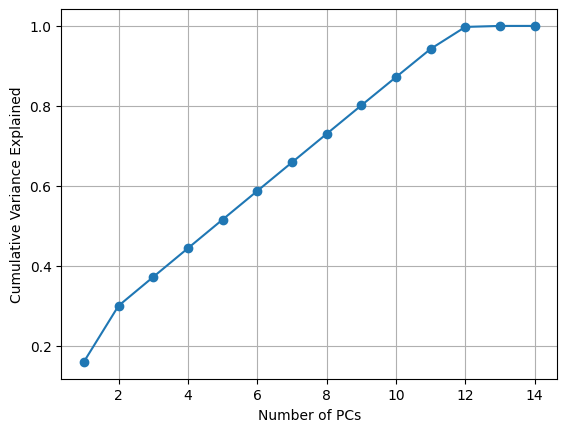

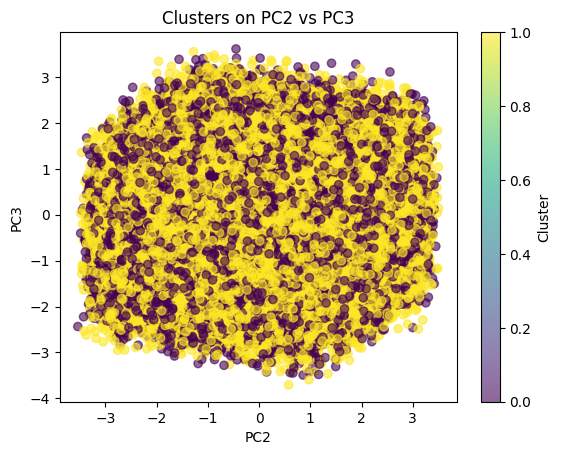

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit full PCA
pca = PCA().fit(X_scaled)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# Try PC2 vs PC3
pcs = PCA(n_components=4).fit_transform(X_scaled)
plt.scatter(pcs[:,1], pcs[:,2], c=kmeans_model.labels_, cmap='viridis', alpha=0.6)
plt.xlabel('PC2'); plt.ylabel('PC3')
plt.title('Clusters on PC2 vs PC3')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Model exported successfully as 'best_rf_model.pkl'.")

NameError: name 'best_rf_model' is not defined

In [ ]:
import joblib
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

print("Model exported successfully as 'best_xgb_model.pkl'.")

In [17]:
# import pickle

# Test loading each file separately
# try:
#     with open('kmeans_model.pkl', 'rb') as f:
#         kmeans = pickle.load(f)
#     print("K-Means model loaded successfully!")
# except Exception as e:
#     print(f"Error loading K-Means: {e}")

# try:
#     with open('xgb_model.pkl', 'rb') as f:
#         rf = pickle.load(f)
#     print("xgb_model model loaded successfully!")
# except Exception as e:
#     print(f"Error loading xgb_model: {e}")